In [1]:
import pandas as pd
data = pd.read_csv("Car insurance data 2022.csv")
data

,Policyholder,Sex,Territory,Driving Experience,Education,Income (EUR),No. of family members,Vehicle production year,Vehicle color,Manufacturer,Mileage (km),Nuber of claims,1. claim amount,2. claim amount,3. claim amount,4. claim amount,Total claim amount (EUR)
0,1.0,male,B,experienced,bachelor,3009.0,1.0,before 2007,yellow,BMW,14831.0,0.0,NaN,NaN,NaN,NaN,0
1,2.0,female,A,experienced,high school,3331.0,3.0,before 2007,red,Fiat,4789.0,0.0,NaN,NaN,NaN,NaN,0
2,3.0,female,A,experienced,high school,1229.0,1.0,2018-2022,yellow,Hyundai,2994.0,0.0,NaN,NaN,NaN,NaN,0
3,4.0,female,A,experienced,master degree,3513.0,1.0,2018-2022,black,Skoda,14600.0,0.0,NaN,NaN,NaN,NaN,0
4,5.0,male,A,experienced,master degree,3597.0,1.0,2018-2022,grey,Opel,8288.0,0.0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,99997.0,male,A,experienced,master degree,4173.0,2.0,2008-2012,red,Opel,20834.0,0.0,NaN,NaN,NaN,NaN,0
99997,99998.0,male,B,experienced,high school,3873.0,2.0,2008-2012,black,Hyundai,5640.0,0.0,NaN,NaN,NaN,NaN,0
99998,99999.0,male,B,experienced,bachelor,2684.0,2.0,2018-2022,blue,Peugeot,9820.0,0.0,NaN,NaN,NaN,NaN,0
99999,100000.0,female,B,beginner,bachelor,3123.0,1.0,before 2007,red,Dacia,15230.0,0.0,NaN,NaN,NaN,NaN,0


In [2]:
print(data.shape)
import numpy as np

print("no. of claims", np.sum(data["Nuber of claims"]))
print("mean no. of claims", np.nanmean(data["Nuber of claims"]))

print("mean of claim amounts",np.nanmean(data["Total claim amount (EUR)"]/data["Nuber of claims"]))

print("E(S)=", np.nanmean(data["Nuber of claims"])*np.nanmean(data["Total claim amount (EUR)"]/data["Nuber of claims"]))

(100001, 17)
no. of claims 4521.0
mean no. of claims 0.04521
mean of claim amounts 5304.694226176719
E(S)= 239.82522596544948


(array([9.5673e+04, 0.0000e+00, 4.1420e+03, 0.0000e+00, 0.0000e+00,
        1.7700e+02, 0.0000e+00, 7.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

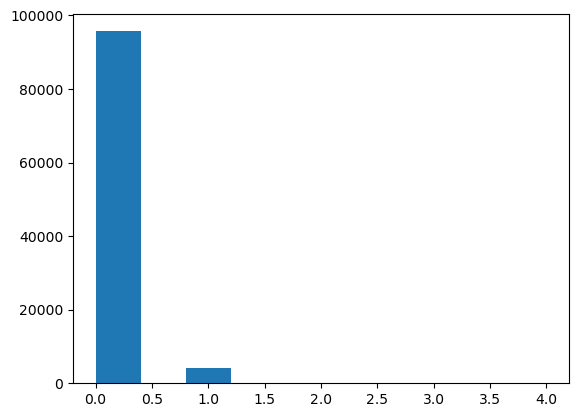

In [3]:
import matplotlib.pyplot as plt

plt.hist(data["Nuber of claims"])

In [4]:
from collections import Counter
Counter(data["Nuber of claims"])
print("mean no. of claims", np.nanmean(data["Nuber of claims"]))


mean no. of claims 0.04521


0.9569052725944054 1.0038742551223734


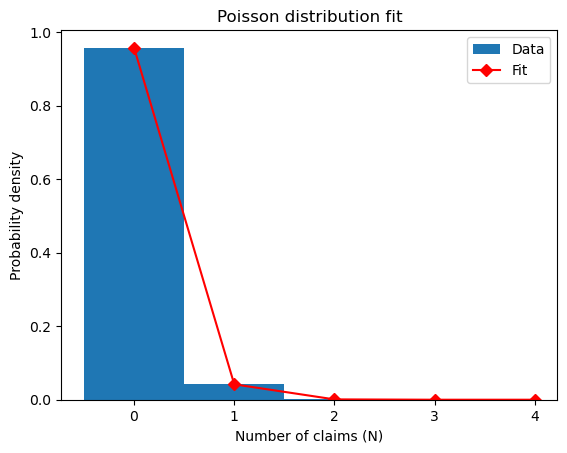

[0.04374411]
Counter({0: 95712, 1: 4202, 2: 85, 3: 1})
Counter({0.0: 95673, 1.0: 4142, 2.0: 177, 3.0: 7, 4.0: 1, nan: 1})


In [7]:

from scipy.optimize import curve_fit
from scipy.stats import poisson, geom, nbinom
# the bins have to be kept as a positive integer because poisson is a positive integer distribution
bins = np.arange(4) - 0.5
entries, bin_edges, patches = plt.hist(data["Nuber of claims"], bins=bins, density=True, label='Data')

# calculate bin centers
middles_bins = (bin_edges[1:] + bin_edges[:-1]) * 0.5

def fit_function(k, lamb):
    # The parameter lamb will be used as the fit parameter
    return poisson.pmf(k, lamb)


p01 = np.nanmean(data["Nuber of claims"])/np.nanstd(data["Nuber of claims"])**2
p02 = np.nanmean(data["Nuber of claims"])**2 / ((np.nanstd(data["Nuber of claims"])**2)-np.nanmean(data["Nuber of claims"]))
print(p01, p02)
# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries, maxfev=100000)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, 5)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='D', linestyle='-',
    color='red',
    label='Fit',
)
plt.legend()
plt.title("Poisson distribution fit")
plt.ylabel('Probability density')
plt.xlabel('Number of claims (N)')
plt.show()

print(parameters)
data3 = np.random.poisson(parameters[0], size=100000)
print(Counter(data3))
print(Counter(data["Nuber of claims"]))

In [6]:
# Calculate the Bayesian Information Criterion (BIC)
def calculate_bic(nll, num_params, num_data_points):
    bic = np.log(num_data_points) * num_params - 2 * nll
    return bic

def neg_log_likelihood(params, data):
    return -np.nansum(poisson.logpmf(data, params))

data2 = data["Nuber of claims"]+1
Counter(data2)

# Calculate the negative log-likelihood
print(parameters)
nll = neg_log_likelihood(parameters[0], data2)
print(nll)

# Calculate the number of parameters and data points
num_params = 2
num_data_points = len(data2)

# Calculate the Bayesian Information Criterion (BIC)
bic = calculate_bic(nll, num_params, num_data_points)
print(bic)

[0.04374411]
334677.44962898863
-669331.8733870474


In [7]:
data2 = data["Nuber of claims"]+1
Counter(data2)

Counter({1.0: 95673, 2.0: 4142, 3.0: 177, 4.0: 7, 5.0: 1, nan: 1})

Estimated parameter (p): 0.5


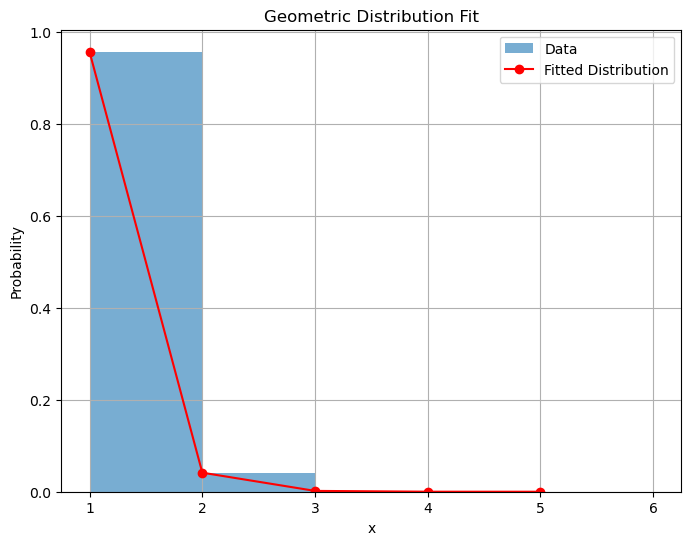

Counter({1: 95679, 2: 4144, 3: 171, 4: 6})
Counter({0.0: 95673, 1.0: 4142, 2.0: 177, 3.0: 7, 4.0: 1, nan: 1})


In [8]:
import numpy as np
from scipy.stats import geom
from scipy.optimize import minimize

# Define the negative log-likelihood function
def neg_log_likelihood(params, data):
    p = params[0]
    return -np.sum(geom.logpmf(data, p))


# Fit the geometric distribution using maximum likelihood estimation
initial_params = [0.5]  # Initial guess for the parameter
result = minimize(neg_log_likelihood, initial_params, args=(data["Nuber of claims"],))
p_hat = result.x[0]

# Print the estimated parameter
print("Estimated parameter (p):", p_hat)

# Plot the fitted distribution and the data
x = np.arange(1, 5 + 1)  # Values for x-axis
y = geom.pmf(x, 0.9567)  # Fitted distribution

plt.figure(figsize=(8, 6))
plt.hist(data["Nuber of claims"], bins=np.arange(1, 5 + 2), density=True, alpha=0.6, label='Data')
plt.plot(x, y, 'ro-', label='Fitted Distribution')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Geometric Distribution Fit')
plt.legend()
plt.grid(True)
plt.show()

data3 = np.random.geometric(p=0.9567, size=100000)
print(Counter(data3))
print(Counter(data["Nuber of claims"]))

In [9]:
# Calculate the Bayesian Information Criterion (BIC)
def calculate_bic(nll, num_params, num_data_points):
    bic = np.log(num_data_points) * num_params - 2 * nll
    return bic

def neg_log_likelihood(p, data):
    return -np.nansum(geom.logpmf(data, p))

data2 = data["Nuber of claims"]+1
Counter(data2)

# Calculate the negative log-likelihood
p=0.9567
print(p)
nll = neg_log_likelihood(p, data2)
print(nll)

# Calculate the number of parameters and data points
num_params = 1
num_data_points = len(data2)

# Calculate the Bayesian Information Criterion (BIC)
bic = calculate_bic(nll, num_params, num_data_points)
print(bic)

0.9567
18620.685183206606
-37229.857430948294


Estimated parameters (r, p): 1.0 0.5
0.9569052725944054 1.0038742551223734


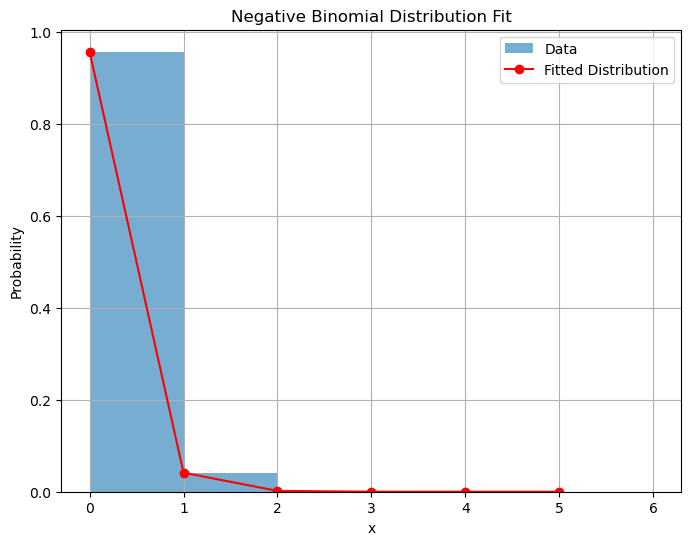

Counter({0: 95756, 1: 4074, 2: 164, 3: 6})
Counter({0.0: 95673, 1.0: 4142, 2.0: 177, 3.0: 7, 4.0: 1, nan: 1})


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.optimize import minimize

# Define the negative log-likelihood function
def neg_log_likelihood(params, data):
    r, p = params
    return -np.sum(nbinom.logpmf(data, r, p))


# Fit the negative binomial distribution using maximum likelihood estimation
initial_params = [1, 0.5]  # Initial guess for the parameters
result = minimize(neg_log_likelihood, initial_params, args=(data["Nuber of claims"],))
r_hat, p_hat = result.x

# Print the estimated parameters
print("Estimated parameters (r, p):", r_hat, p_hat)

p01 = np.nanmean(data["Nuber of claims"])/np.nanstd(data["Nuber of claims"])**2
p02 = np.nanmean(data["Nuber of claims"])**2 / ((np.nanstd(data["Nuber of claims"])**2)-np.nanmean(data["Nuber of claims"]))
print(p01, p02)

# Plot the fitted distribution and the data
x = np.arange(0, np.max(data2) + 1)  # Values for x-axis
y = nbinom.pmf(x, p02, p01)  # Fitted distribution

plt.figure(figsize=(8, 6))
plt.hist(data["Nuber of claims"], bins=np.arange(0, np.max(data2) + 2), density=True, alpha=0.6, label='Data')
plt.plot(x, y, 'ro-', label='Fitted Distribution')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Negative Binomial Distribution Fit')
plt.legend()
plt.grid(True)
plt.show()

data3 = np.random.negative_binomial(n=p02, p=p01, size=100000)
print(Counter(data3))
print(Counter(data["Nuber of claims"]))

In [11]:
# Calculate the Bayesian Information Criterion (BIC)
def calculate_bic(nll, num_params, num_data_points):
    bic = np.log(num_data_points) * num_params - 2 * nll
    return bic

def neg_log_likelihood(params, data):
    r, p = params
    print(r,p)
    return -np.nansum(nbinom.logpmf(data, r, p))

data2 = data["Nuber of claims"]+1
Counter(data2)

# Calculate the negative log-likelihood
parameters = [p02,p01]
print(parameters)
nll = neg_log_likelihood(parameters, data2)
print(nll)

# Calculate the number of parameters and data points
num_params = 2
num_data_points = len(data2)

# Calculate the Bayesian Information Criterion (BIC)
bic = calculate_bic(nll, num_params, num_data_points)
print(bic)

[1.0038742551223734, 0.9569052725944054]
1.0038742551223734 0.9569052725944054
332677.9455590126
-665332.8652470954


In [12]:
def calculate_chi_square(f_obs, f_expected):
    chi_square = 0
    for i in range(f_obs.shape[0]):
        if f_obs[i]>=7:
            chi_square = chi_square + ((f_expected[i]-f_obs[i])**2)/f_expected[i]
    return chi_square


In [13]:
#calculate_chi_square(data3, data["Nuber of claims"])
from scipy.stats import chisquare
#data["Nuber of claims"] = np.delete(data["Nuber of claims"], len(data["Nuber of claims"])-1)
freq_obs = Counter(data["Nuber of claims"]).values()


#data3 = np.random.negative_binomial(n=1.003874, p=0.95690, size=100001)
#data3 = np.random.geometric(p=0.9567, size=100000)
data3 = np.random.poisson(0.04521, size=100001)

f_obs = np.array(list(freq_obs))
f_obs = np.sort(f_obs)[::-1]
freq_exp = Counter(data3).values()

f_exp = np.array(list(freq_exp))
f_exp = np.sort(f_exp)[::-1]
print(f_obs)
print(f_exp)
"""
if f_exp.shape[0]!=f_obs.shape[0]:
    if  f_obs.shape[0]-f_exp.shape[0]>0:
        new = f_obs[0:f_exp.shape[0]]
new = np.concatenate((f_exp, [0,0]))
print(new)
chisquare(f_obs=f_obs, f_exp=new)
"""

aa = calculate_chi_square(f_obs, f_exp)
import scipy
p_value = 1 - scipy.stats.chi2.cdf(x=aa, df=1)  # Find the p-value
print(p_value)

[95673  4142   177     7     1     1]
[95605  4292   101     3]
2.220446049250313e-16


In [14]:
print(Counter(data["Nuber of claims"]))

Counter({0.0: 95673, 1.0: 4142, 2.0: 177, 3.0: 7, 4.0: 1, nan: 1})


Counter({0.0: 95673, 1.0: 4142, 2.0: 177, 3.0: 7, 4.0: 1, nan: 1}) 

Poisson: 
Counter({0: 95735, 1: 4172, 2: 92, 3: 1}) 

Geometric:
Counter({1: 95700, 2: 4113, 3: 179, 4: 8})

Neg Binomial:
Counter({0: 95621, 1: 4201, 2: 172, 3: 6})

poisson: 334677.44962898863
-669331.8733870474 

neg binomial: 332677.9455590126
-665332.8652470954

geometrical: 18620.685183206606
-37229.857430948294

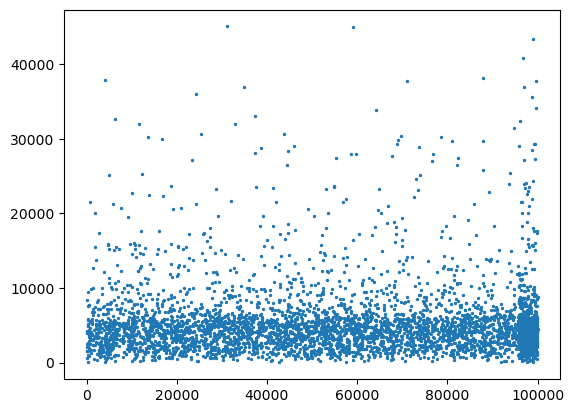

In [15]:
plt.scatter(np.arange(0,100001, 1),data["Total claim amount (EUR)"]/data["Nuber of claims"], s=2)

(array([ 50., 108., 175., 231., 244., 277., 285., 293., 319., 335., 328.,
        296., 249., 172., 128., 101.,  72.,  84.,  54.,  44.,  45.,  41.,
         38.,  31.,  17.,   9.,  25.,  20.,  18.,   8.,  19.,  10.,  10.,
         14.,  16.,   9.,   6.,   6.,  10.,   8.,   9.,   4.,   2.,   5.,
          5.,   5.,   2.,   8.,   3.,   3.,   3.,   7.,   6.,   2.,   2.,
          2.,   2.,   1.,   2.,   0.,   6.,   1.,   5.,   2.,   4.,   4.,
          3.,   2.,   2.,   1.,   1.,   1.,   2.,   1.,   0.,   2.,   0.,
          0.,   0.,   2.,   0.,   0.,   2.,   2.,   2.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          2.]),
 array([1.00000e+01, 4.60400e+02, 9.10800e+02, 1.36120e+03, 1.81160e+03,
        2.26200e+03, 2.71240e+03, 3.16280e+03, 3.61320e+03, 4.06360e+03,
        4.51400e+03, 4.96440e+03, 5.41480e+03, 5.86520e+03, 6.31560e+03,
        6.76600e+03, 7.21640e+03, 7.66680e+03, 8.11720e+03, 8.56760e+03,
        9.01800e+03, 9.468

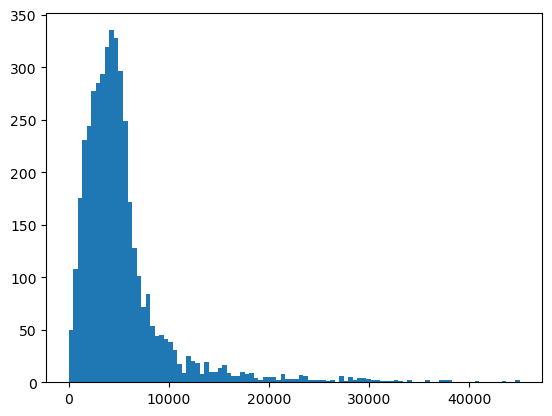

In [16]:
plt.hist(data["Total claim amount (EUR)"]/data["Nuber of claims"], bins=100)